In [1]:
import glob
import csv
import math
import collections
import os.path
from sets import Set
import sys

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=2)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import scipy  
import scikits.bootstrap as bootstrap
#from scipy import stats
import scipy.stats as ss
import matplotlib.gridspec as gridspec
#from IPython.display import Image

from PIL import Image
from IPython.display import Image as ipyImage

import prettyplotlib as ppl
from matplotlib.colors import LogNorm
from prettyplotlib import brewer2mpl


#%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
%rehashx

#import mpld3
#mpld3.enable_notebook()

pd.__version__

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: the sets module is deprecated
  


u'0.20.3'

In [2]:
data_path = ""
scripts_path = ""
analysis_directory = ""
data_name = ""

In [3]:
def add_treatment(dic, series, label=None, longname=None, 
                  shortname=None, designation=None,
                  experiment=None, subexperiment=None, treatment=None, location=None, filename=None):
    if not label:
        if (experiment):
            label = experiment
            if (treatment):
                label += "_" + treatment
        else:
            print "ERROR, call must contain either label or experiment."
   
    if not longname:
        if (experiment):
            longname = experiment
            if (treatment):
                longname += "_" + treatment
        else:
            longname = label
        
    if not shortname:
        if (experiment):
            shortname = experiment
            if (treatment):
                shortname += "_" + treatment
        else:
            shortname = label
            
    if not experiment:
        experiment = label
    
    if not location:        
        location = series
        if (designation):
            location += "_" + designation            
        location += "_" + experiment
        if (subexperiment):
            location += "_" + subexperiment
        if (treatment):
            location += "_" + treatment
        location += "_" + series
    
    dic[label] = {'longlabel': longname, 'shortlabel': shortname, 
                  'dir': location, 'exp': experiment, 'subex': subexperiment,
                  'treatment': treatment, 'designation': designation, 'filename': filename}    

In [4]:
import collections

## Dataset-specific -- edit me
data_number = "901"
data_name = "CyclicCE 3Input QuiescentPeriod vs CE Diversity__longer"


treatments = collections.OrderedDict()
add_treatment(treatments, data_number, designation="D2", label="Control", experiment="control_intertwined",
             location="D2_control_intertwined_"+data_number)
add_treatment(treatments, data_number, designation="E1", label="Benign", experiment="noreward_intertwined",
             location="E1_noreward_intertwined_"+data_number)
add_treatment(treatments, data_number, designation="F1", label="Harsh", experiment="punish_intertwined",
             location="F1_punish_intertwined_"+data_number)

add_treatment(treatments, data_number, designation="E2", label="Benign_PR", experiment="noreward_ce_pr_intertwined",
             location="E2_noreward_ce_pr_intertwined_"+data_number)
add_treatment(treatments, data_number, designation="F2", label="Harsh_PR", experiment="punish_ce_pr_intertwined",
             location="F2_punish_ce_pr_intertwined_"+data_number)

#add_treatment(treatments, data_number, designation="E3", label="Benign_Long", experiment="noreward_intertwined",
#             location="E3_noreward_intertwined_"+data_number)
#add_treatment(treatments, data_number, designation="E4", label="Benign_PR_Long", experiment="noreward_ce_pr_intertwined",
#             location="E4_noreward_ce_pr_intertwined_"+data_number)

#add_treatment(treatments, data_number, designation="G1", label="Harsh_PR_Benign", experiment="punish_ce_pr_noreward_intertwined",
#             location="G1_punish_ce_pr_noreward_intertwined_"+data_number)

## basic config
base_path = "/Core/home/rosiec/__research/mutational_landscapes/raw_data/"
analysis_directory = "analysis"
scripts_path = "~/Dropbox/School_Docs/Research/research_scripts/"

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))
data_path = base_path + data_directory
analysis_path = data_path + "/" + analysis_directory

print data_path
print analysis_path

print treatments.keys()
for val in treatments.values():
    print val

/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer
/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer/analysis
['Control', 'Benign', 'Harsh', 'Benign_PR', 'Harsh_PR']
{'shortlabel': 'control_intertwined', 'longlabel': 'control_intertwined', 'exp': 'control_intertwined', 'subex': None, 'filename': None, 'designation': 'D2', 'dir': 'D2_control_intertwined_901', 'treatment': None}
{'shortlabel': 'noreward_intertwined', 'longlabel': 'noreward_intertwined', 'exp': 'noreward_intertwined', 'subex': None, 'filename': None, 'designation': 'E1', 'dir': 'E1_noreward_intertwined_901', 'treatment': None}
{'shortlabel': 'punish_intertwined', 'longlabel': 'punish_intertwined', 'exp': 'punish_intertwined', 'subex': None, 'filename': None, 'designation': 'F1', 'dir': 'F1_punish_intertwined_901', 'treatment': None}
{'shortlabel': 'noreward_ce_pr_intertwined', 'longlab

In [5]:
%cd {data_path}
!mkdir incomplete

import glob
import os

target_update = '400000'

bleh = []
for t in treatments:
    datafiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
    for item in datafiles:
        filepath = item +"/data/count.dat"
        #print filepath
        line = !tail -n 1 $filepath
        if not os.path.exists(filepath):
            filepath += ".gz"
            line = !zcat $filepath | tail -n 1 
            
            if not os.path.exists(filepath):
                print "count.dat[.gz] does not exist. Cannot verify. Continuing."
                continue
        
#        print filepath

        #bleh = line
#        print line
        #line = line.split(' ')[0]
        #print line
        if len(line) == 0 or line[0].split(' ')[0] != target_update:
            print "Incomplete", item, line
            !mv $item incomplete/
    
%mkdir {analysis_directory}
%cd {analysis_directory}
#%pwd

for t in treatments:
    print t, ": " , len(glob.glob(data_path+'/'+treatments[t]['dir']+'*'))
    
 

/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer
mkdir: cannot create directory ‘incomplete’: File exists
mkdir: cannot create directory ‘analysis’: File exists
/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer/analysis
Control :  100
Benign :  100
Harsh :  100
Benign_PR :  99
Harsh_PR :  100


In [6]:
pwd

u'/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer/analysis'

In [7]:
def test_data_accessibility(treatments):
    !pwd
    direct = treatments[treatments.keys()[0]]['dir']
    print "regular cat"
    %cat ../{direct}001/data/log_average.dat | head -n 20
    print
    print "zcat"
    %zcat ../{direct}001/data/log_average.dat* | head -n 20
    
test_data_accessibility(treatments)

/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer/analysis
regular cat
cat: ../D2_control_intertwined_901001/data/log_average.dat: No such file or directory

zcat
# Avida Fitness Data
# Mon Aug 14 12:07:34 2017
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf -nan -nan 
50 63.0008 0.16173 94.1641 -inf -nan -nan 
100 63.5306 0.12915 59.8139 4.09154 0.0103915 0.387225 
150 63.2881 0.140456 70.8428 4.07936 0.0110362 0.437376 
200 63.5422 0.127665 58.6256 4.09465 0.0100996 0.366899 
250 63.1564 0.150752 81.6097 4.0616 0.0123069 0.543889 
300 63.3183 0.137134 67.5689 4.08057 0.011029 0.437052 
350 63.3708 0.134796 65.4118 4.08582 0.010593 0.403958 
400 63.4589 0.131133 61.8533 4.09121 0.0102628 0.378856 
450 63.3713 0.135243 65.8095 4.08682 0.0105045 0.397021 

gzip: stdout: Broken pipe


In [8]:
def test_scripts_accessibilty(treatments):
    import sys
    sys.path.append({scripts_path})
    %run {scripts_path}/quickplot.py --help
    
test_scripts_accessibilty(treatments)

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

### Helper Functions

#### Dataset Manipulation (Grab/Thin)

In [9]:
def grab_set(ts, factor=None, series=None):
    if not factor and not series:
        return ts
    if series and factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               (factor in ts[t]['factors'].values() and 
               ts[t]['series'] == series)]
        
        #print "HI", series, factor
        #print thing
        
    elif factor:
        thing = [ts[t]['shortlabel'] for t in ts if 
               factor in ts[t]['factors'].values()]
    elif series:
        thing = [ts[t]['shortlabel'] for t in ts if 
               ts[t]['series'] == series]
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_grab_set(treatments):

    print "Subsetting"
    print treatments.keys()
    print
    print "Subset, selecting on series AC-1"
    print grab_set(series="AC-1", ts=treatments).keys()

In [10]:
## THIN SETS
def thin_set(ts, factor=None, series=None):

    thing = ts.keys()
    
    if factor:
        for t in ts.keys():
            if factor in ts[t]['factors'].values():
                thing.remove(t)
                
    if series:
        for t in ts.keys():
            if series == ts[t]['series']:
                thing.remove(t)
        
    subset = collections.OrderedDict()
    for t in thing:
        subset[t] = ts[t]
        
    return subset

def test_thin_set(treatments):
    print
    print "Thinning Set"
    print treatments.keys()
    thingy = grab_set(series="AC-2", factor="Homol", ts=treatments)
    print
    print "Subset selecting by HOMOL factor"
    print thingy.keys()
    print
    print "Thinned by removing MRI factor"
    print thin_set(factor="MRI", ts=thingy).keys()

In [11]:
def factorset(treatments):
    factorset = None
    for t in ac2_set:
        if not factorset:
            factorset = set(treatments[t]['factors'].keys())
        factorset &= set(treatments[t]['factors'].keys())
    return list(factorset)

In [12]:
def matchingcolumns(dataset1, dataset2):
    return list( set(dataset1.columns) & set(dataset2.columns) )
    

# Task Performance

In [13]:
%pwd

u'/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer/analysis'

In [14]:
%pwd 

def generate_data(use_pickled=False):
    picklename = "ce_task_performance.pd.pickle"

    ## check for pickling!
    if use_pickled and os.path.exists(picklename):
        task_perf = pd.read_pickle(picklename)
        return task_perf
        
    
    data = []
    
    
    tct = 0
    for t in treatments:  
        tct += 1
        print t

        dfs = []

        for i in range(1,101):

            bit = str(i).zfill(2) ## runs from 01 to 50
            globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/tasks.dat*'
            dfiles = sorted(glob.glob(globstring))

            for item in dfiles:
                sys.stdout.write('.')

                df = pd.read_csv(item, header=None, comment="#", 
                                  delimiter=' ', usecols=[0]+range(3, 71),
                                  skipinitialspace=True) #, names=fields)


                df['treatment'] = [t] * len(df)
                df['replicate'] = [i] * len(df)


                ## TODO, collect the booled bits.
                ## figure out how to do this efficiently, while fighting with the fucking series.
                col_list = list(df)
                col_list.remove(0)

                bleh = df[col_list].where(lambda x : x > 3.6, axis=1)
                bleh = bleh.fillna(value=0, axis=1).astype(bool)

                running = [False] * len(bleh.iloc[0].tolist())
                running_post_reward = [False] * len(bleh.iloc[0].tolist())
                running_ct = []
                running_post_reward_ct = []

                for i in range(len(bleh)):

                    running = [k | j for k,j in zip(running, bleh.iloc[i].tolist())]
                    running_ct.append(sum( [int(l) for l in running] ))

                    if (i * 50) >= 200000:
                        running_post_reward = [k | j for k,j in zip(running_post_reward, bleh.iloc[i].tolist())]
                        running_post_reward_ct.append(sum( [int(l) for l in running_post_reward] ))

                    else:
                        running_post_reward_ct.append(0)




                df['new_tasks'] = running_ct
                df['new_tasks_post_reward'] = running_post_reward_ct

                dfs.append( df )

        intermediate = pd.concat(dfs)

        col_list = list(intermediate)
        col_list.remove(0)

        dta = pd.DataFrame()

        dta['update'] = intermediate[0]

        dta['treatment'] = intermediate['treatment']

        dta['replicate'] = intermediate['replicate']

        dta['new_tasks'] = intermediate['new_tasks']
        dta['new_tasks_post_reward'] = intermediate['new_tasks_post_reward']

        dta['task_sum'] = intermediate[col_list].sum(axis=1)

        bleh = intermediate[col_list].where(lambda x : x > 3.6, axis=1)
        bleh = bleh.fillna(value=0, axis=1).astype(bool).sum(axis=1)   
        dta['task_ct'] = bleh

        #print dta.describe()
        #print dta.head()

        data.append(dta)

        print "  done"

    data = pd.concat(data)
    
    def label_env(row):
        if 'Harsh_PR' in row['treatment']:
            return 'Harsh'
        elif 'Benign_PR' in row['treatment']:
            return 'Benign'
        elif 'Harsh' in row['treatment']:
            return 'Harsh_q'
        elif 'Benign' in row['treatment']:
            return 'Benign_q'
        else:
            return 'Static'
    data['Env'] = data.apply(lambda row: label_env(row), axis=1)
    
    ## if we generate the data, pickle it
    data.to_pickle(picklename)

    return data

task_perf = generate_data(use_pickled=True) 
print task_perf.describe()
print task_perf.head()

# def label_env(row):
#     if 'Harsh_PR' in row['treatment']:
#         return 'Harsh'
#     elif 'Benign_PR' in row['treatment']:
#         return 'Benign'
#     elif 'Harsh' in row['treatment']:
#         return 'Harsh_q'
#     elif 'Benign' in row['treatment']:
#         return 'Benign_q'
#     else:
#         return 'Static'
# task_perf['Env'] = task_perf.apply(lambda row: label_env(row), axis=1)
# task_perf.to_pickle("ce_task_performance.pd.pickle")

             update     replicate     new_tasks  new_tasks_post_reward  \
count  3.992499e+06  3.992499e+06  3.992499e+06           3.992499e+06   
mean   2.000000e+05  5.043287e+01  2.561575e+01           1.364922e+01   
std    1.154845e+05  2.885596e+01  1.052395e+01           1.554886e+01   
min    0.000000e+00  1.000000e+00  1.000000e+00           0.000000e+00   
25%    1.000000e+05  2.500000e+01  1.700000e+01           0.000000e+00   
50%    2.000000e+05  5.000000e+01  2.600000e+01           2.000000e+00   
75%    3.000000e+05  7.500000e+01  3.300000e+01           2.800000e+01   
max    4.000000e+05  1.000000e+02  7.000000e+01           7.000000e+01   

           task_sum       task_ct  
count  3.992499e+06  3.992499e+06  
mean   7.964976e+03  8.607235e+00  
std    1.296110e+04  7.078618e+00  
min    2.000000e+00  1.000000e+00  
25%    7.900000e+01  3.000000e+00  
50%    1.720000e+02  5.000000e+00  
75%    1.408500e+04  1.300000e+01  
max    1.892240e+05  7.200000e+01  
   update

In [15]:
def ts_violin(data, field, ylabel=None, 
              huename=None, title=None):

    
    ## collect data for violin
    piece = data.loc[data['update'] == 400000]
    
    colorp = sns.color_palette("colorblind")
    labels = list(piece['Env'].unique())    
   

    ## prep plot
    plt.rcParams['figure.figsize'] = (20, 10)
    if title:
        plt.suptitle(title)

    colorp2 = ['black', colorp[5], colorp[3], colorp[0], colorp[2]]    
    colors2 = {}
    for l,c in zip(labels,colorp2):
        colors2[l] = c         
        
    ## timeseries
    plt.subplot(121)
    ax = sns.tsplot(time="update", value=field,
                    unit="replicate", 
                    condition="Env",
                    data=data,
                    color=colors2,
                    #order=['Static', 'Benign', 'Benign_q', 'Harsh', 'Harsh_q'],
                    #palette=colors,
                    ci=[95])
    #for line, style in zip(ax.lines, linestyles):
    #    line.set_linestyle(style)
    ax.legend(title='Treatment')
    if ylabel:
        ax.set_ylabel(ylabel)

    ## violin + swarm
    plt.subplot(122)
    
    hue = None
    split = False
    if huename:
        split = True
        hue = 'factor'
    
    colorp1 = ['lightgray', colorp[5], colorp[3], colorp[0], colorp[2]] 
    colors1 = {}
    for l,c in zip(labels,colorp1):
        colors1[l] = c
    
    ax = sns.violinplot(x="Env", y=field, hue=hue, 
                   data=piece, 
                   split=split, 
                   scale="count", scale_hue=False, bw=.3,
                   linewidth=1,
                   order=['Static', 'Benign', 'Benign_q', 'Harsh', 'Harsh_q'],                        
                   edgecolor="black",
                   palette=colors1,
                   inner="quart")
    sns.swarmplot(x="Env", y=field, hue=hue, 
                  data=piece, 
                  order=['Static', 'Benign', 'Benign_q', 'Harsh', 'Harsh_q'],                  
                  linewidth=0.3,
                  edgecolor="black",
                  palette=colors1,
                  split=split)    
    handles, labels = ax.get_legend_handles_labels()
    if huename:
        ax.legend(handles[:2], labels[:2], title=huename)
    else:
        ax.legend(handles[:2], labels[:2])
    if ylabel:
        ax.set_ylabel(ylabel)


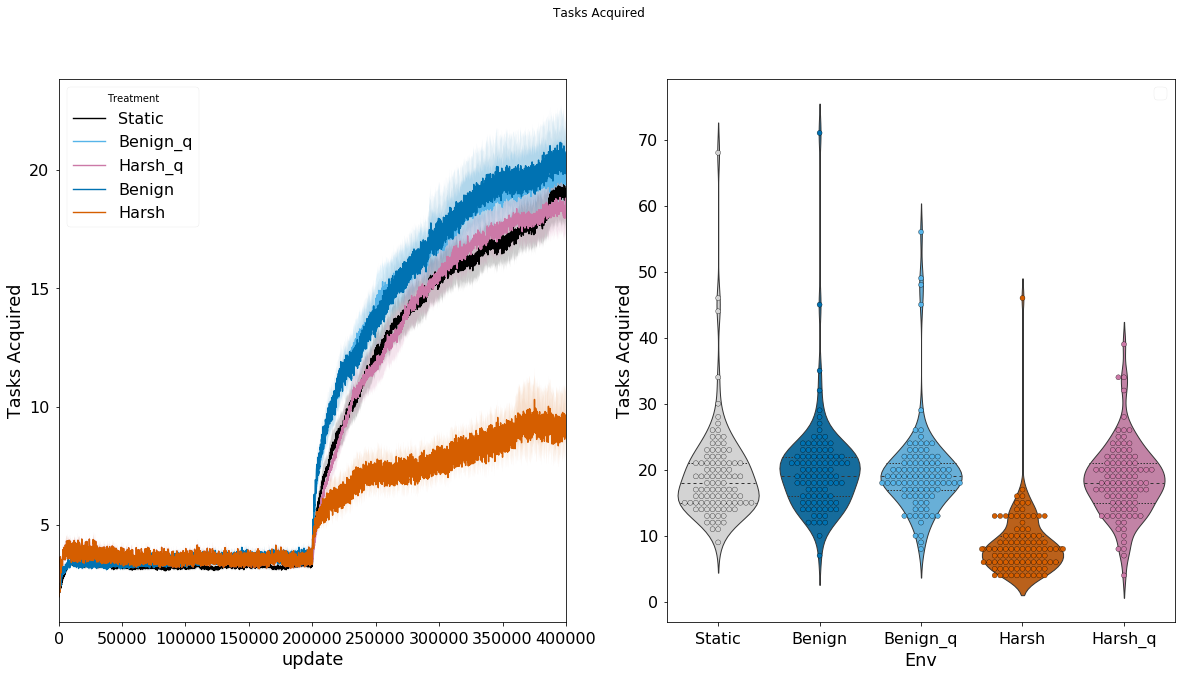

In [16]:
ts_violin(task_perf, 
          "task_ct", ylabel="Tasks Acquired", 
          #huename='Instruction',
          #colors=colors,
          title="Tasks Acquired")


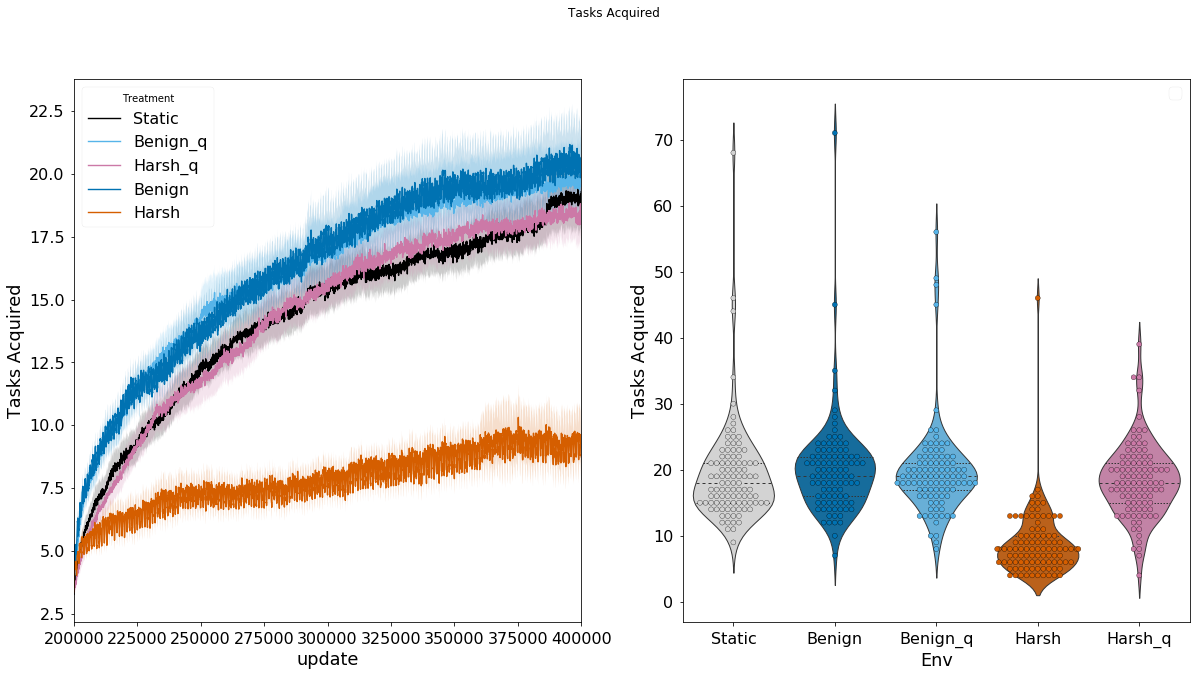

In [17]:
ts_violin(task_perf.loc[task_perf['update'] >= 200000], 
          "task_ct", ylabel="Tasks Acquired", 
          #huename='Instruction',
          #colors=colors,
          title="Tasks Acquired")
